# Weighted Graph

In [16]:
# each tuple (u, v, w) represents an edge from u to v with weight w.
edges = [(0, 1, 10), (0, 2, 80), (1, 2, 6), (1, 4, 20),
         (2, 3, 70), (4, 5, 50), (4, 6, 5), (5, 6, 10)]

In [17]:
def get_vertices(edges):
  # extracts unique vertices from a list of edges.
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)
  return vertices


vertices = get_vertices(edges)
print(vertices)

{0, 1, 2, 3, 4, 5, 6}


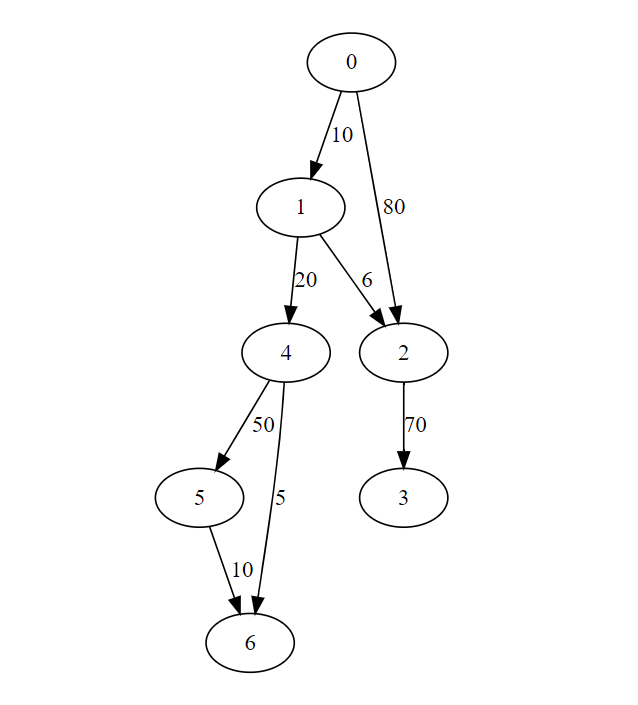

## Adjacency matrix (with weights)

In [18]:
def create_adjacency_matrix(vertices, edges):
  size = len(vertices)
  adjacency_matrix = [[(0, 0) for j in range(size)] for i in range(size)]  # initialize (skeleton)

  for u, v, w in edges:
    adjacency_matrix[u][v] = (1, w)  # links

  return adjacency_matrix


# output: (1/0, weight) at [u][v] where 1 means link exists, 0 means no link
create_adjacency_matrix(vertices, edges)

[[(0, 0), (1, 10), (1, 80), (0, 0), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (1, 6), (0, 0), (1, 20), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (1, 70), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 50), (1, 5)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 10)],
 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]]

## Adjacency list (with weights)

In [19]:
def create_adjacency_list(vertices, edges):
  adjacency_list = {u: [] for u in vertices}  # initialize

  for u, v, w in edges:
    adjacency_list[u].append((v, w))  # links

  return adjacency_list


# Output: list of (v, weight) at u where u has links to v with weight
create_adjacency_list(vertices, edges)

{0: [(1, 10), (2, 80)],
 1: [(2, 6), (4, 20)],
 2: [(3, 70)],
 3: [],
 4: [(5, 50), (6, 5)],
 5: [(6, 10)],
 6: []}

# Some utility functions

In [20]:
# Prints the graph structure according to: https://csacademy.com/app/graph_editor/
def print_graph(adjacency_list):
  vertices = sorted(adjacency_list)
  edges = []

  for vertex in adjacency_list:
    for neighbor in adjacency_list[vertex]:
      edges.append((vertex, neighbor))

  # print vertices
  for vertex in vertices:
    print(vertex)

  # print edges
  for edge in edges:
    print(f"{edge[0]} {edge[1][0]} {edge[1][1]}")


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

print_graph(adjacency_list)

A
B
C
D
E
A B 4
A C 2
B C 3
B D 2
B E 3
C B 1
C D 4
C E 5
E D 1


In [21]:
# Returns an undirected version of the adjacency list where for every u-v link there is a v-u link
def get_undirected(adjacency_list):
  # copy the original adjacency list
  undirected_list = {vertex: neighbors[:] for vertex, neighbors in adjacency_list.items()}

  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      # add vertex to neighbor's list if not already present
      found = False
      for adj_vertex, _ in undirected_list[neighbor]:  # _ represents the weight
        if adj_vertex == vertex:
          found = True
          break
      if not found:
        undirected_list[neighbor].append((vertex, weight))

  # sort neighbors of each vertex based on vertex index (0)
  for vertex in undirected_list:
    undirected_list[vertex].sort(key=lambda x: x[0])  # x: (vertex, weight)

  return undirected_list


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(3, 15), (2, 4)],
    2: [(3, 11)],
    3: []
}

get_undirected(adjacency_list)

{0: [(1, 10), (2, 6)],
 1: [(0, 10), (2, 4), (3, 15)],
 2: [(0, 6), (1, 4), (3, 11)],
 3: [(1, 15), (2, 11)]}

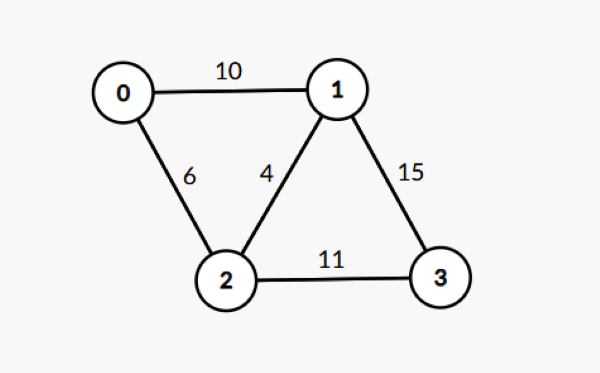

# Dijkstra's Algorithm

> Finds the shortest path from a single source vertex to all other vertices.

**Difference between algorithms 1 and 2**

Both algorithms update distances to neighbors but differ in how they select the minimum distance vertex (`current_vertex`):

- Algorithm 1 loops over all unvisited vertices to find the minimum distance vertex.
- Algorithm 2 uses a priority queue to dequeue the minimum distance vertex efficiently.

Once a `current_vertex` is selected, they both use the same logic to update neighbor distances.

### Algorithm 1

- Use a _loop_ to select the unvisited vertex with the smallest distance,
- mark it as visited,
- and update distances to its neighbors _until all vertices are processed_.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Initialize `visited` to track visited vertices (`False` initially).
   - Initialize `distance` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).

2. **Iterate until all vertices are processed**:
   - Find `current_vertex` (the unvisited vertex with the smallest distance).
   - Break if no `current_vertex` is found (all visited).
   - Mark `current_vertex` as visited.
   - For each _unvisited_ neighbor of `current_vertex`:
     - Calculate `new_distance`.
     - If `new_distance` is shorter:
       - Update `distance[neighbor]`.

3. **Result**:
   - `distance` has shortest paths from `start_vertex` to all vertices.

In [22]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  # loop until all vertices have been processed
  while True:
    # find the vertex with the smallest distance among unvisited vertices
    current_vertex = None
    for vertex in adjacency_list:
      if not visited[vertex]:
        if current_vertex is None or distance[vertex] < distance[current_vertex]:
          current_vertex = vertex

    if current_vertex is None:
      break  # no more vertices to process (all visited)

    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

In [23]:
adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')

{'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

Dijkstra's algorithm in 3 minutes (https://youtu.be/_lHSawdgXpI)

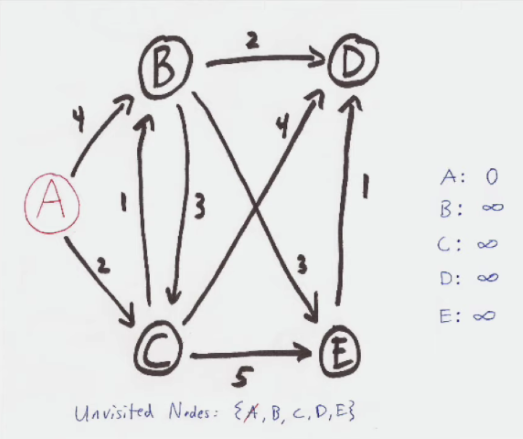

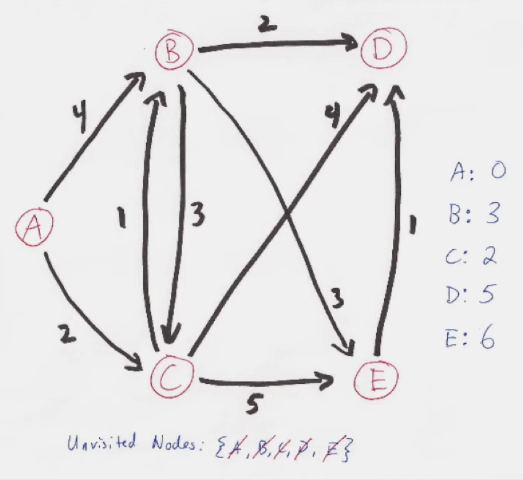

### Algorithm 2

- Use a _priority queue_ to _dequeue_ the unvisited vertex with the smallest distance,
- mark it as visited,
- update distances to its unvisited neighbors,
- and enqueue them with updated distances _until the queue is empty_.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Initialize `visited` to track visited vertices (`False` initially).
   - Initialize `distance` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).
   - Create a `PriorityQueue` (`pq`).
   - Enqueue `start_vertex` with priority `0`.

2. **Iterate until the priority queue is empty**:
   - Dequeue `current_vertex` from `pq`.
   - Mark `current_vertex` as visited.
   - For each _unvisited_ neighbor of `current_vertex`:
     - Calculate `new_distance`.
     - If `new_distance` is shorter:
       - Update `distance[neighbor]`.
       - Enqueue `neighbor` with `new_distance`.

3. **Result**:
   - `distance` has shortest paths from `start_vertex` to all vertices.

🌿🌿 **How a Priority Queue Works**

- A priority queue enqueues tuples `(priority, value)`, sorting by priority.
- Imagine a queue where the richest people leave first, based on net worth, not arrival order.
- In Dijkstra's algorithm, `dequeue()` returns the highest priority (lowest distance) item each time.

In [24]:
import heapq

heap = []

# priority queue based on student marks and names (lower marks prioritized)
heapq.heappush(heap, (80, 'rahul'))
heapq.heappush(heap, (100, 'vidhatri'))
heapq.heappush(heap, (50, 'cmd'))

display(heap)

print(heapq.heappop(heap))
print(heapq.heappop(heap))
print(heapq.heappop(heap))

[(50, 'cmd'), (100, 'vidhatri'), (80, 'rahul')]

(50, 'cmd')
(80, 'rahul')
(100, 'vidhatri')


In [25]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]  # [0] is priority, [1] is item


def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

In [26]:
adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')

{'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

# Bellman-Ford Algorithm

Relax all edges _repeatedly_ ($|V|-1$ times) to find the shortest paths from the start vertex, and check for negative-weight cycles (optional).

🌿🌿 **Relaxation**

Relaxation refers to the process of updating the shortest known distance to a vertex if a shorter path is found through another vertex.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Initialize `distance` with shortest distances from `start_vertex` (`inf` initially, `0` for `start_vertex`).

2. **Relax all edges $|V|-1$ times**:
   - For _each_ vertex and its neighbors:
     - Update `distance[neighbor]` if a shorter path is found through the current vertex.

3. **Negative-Weight Cycle Check (optional)**:
   - Check all edges one more time:
     - Raise an error if a shorter path is still found, indicating a negative-weight cycle.

4. **Result**:
   - `distance` has shortest paths from `start_vertex` to all vertices or raises an error if a negative-weight cycle is detected.

Bellman-Ford in 4 minutes — Theory (https://youtu.be/9PHkk0UavIM)

Bellman-Ford in 5 minutes — Step by step example (https://youtu.be/obWXjtg0L64)

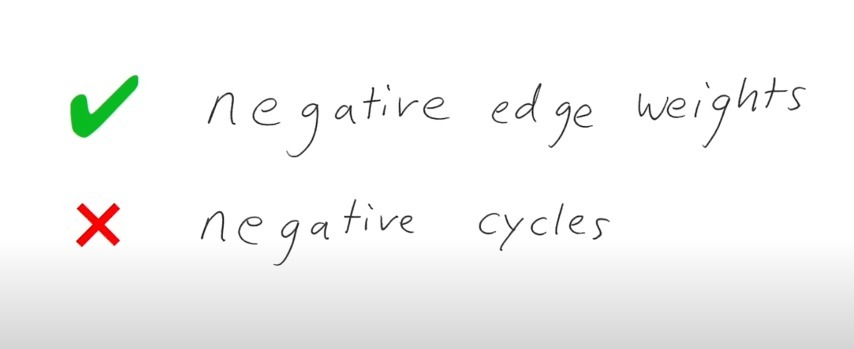

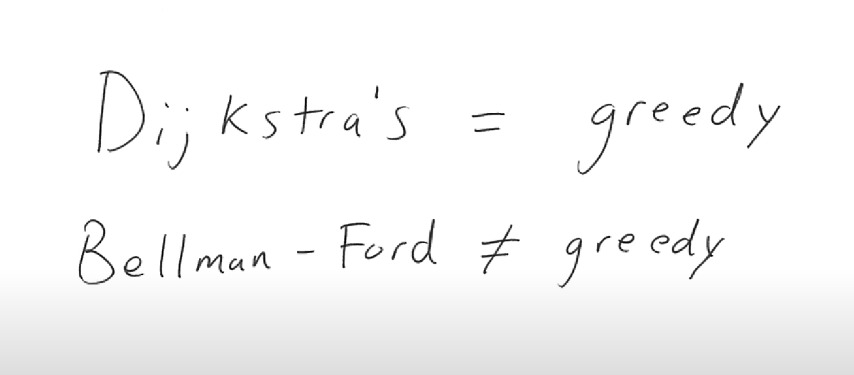

**Negative weights on edges:**

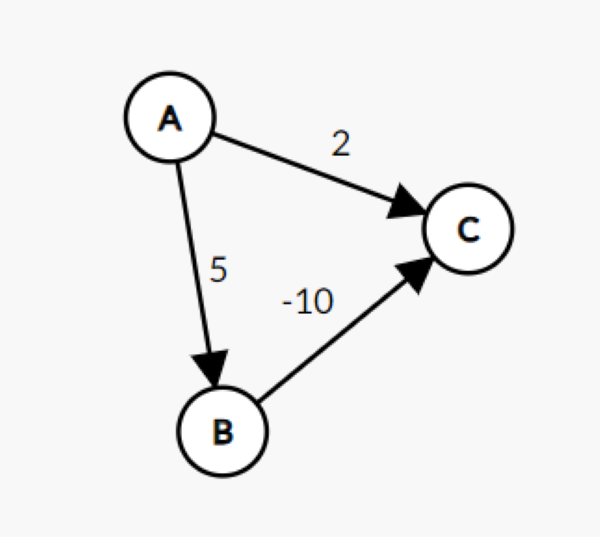

**Negative cycles in a weighted graph:**

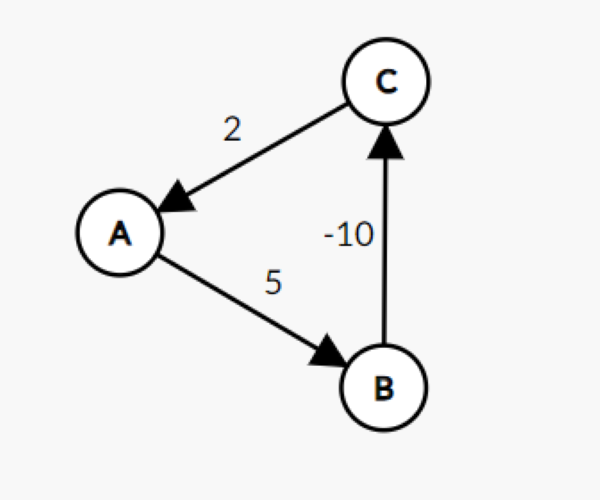

In [27]:
def bellman_ford(adjacency_list, start_vertex):
  # initialize distances
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  # relax all edges |V|-1 times
  for _ in range(len(adjacency_list) - 1):
    for vertex in adjacency_list:
      for neighbor, weight in adjacency_list[vertex]:
        if distance[vertex] != float('inf'):
          new_distance = distance[vertex] + weight
          if new_distance < distance[neighbor]:
            distance[neighbor] = new_distance

  # optional: check for negative-weight cycles
  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      if distance[vertex] != float('inf'):
        new_distance = distance[vertex] + weight
        if new_distance < distance[neighbor]:
          raise ValueError("Graph contains a negative-weight cycle")

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

bellman_ford(adjacency_list, 0) == {0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 80, 6: 35}

True

In [28]:
adjacency_list = {
    'S': [('E', 8), ('A', 10)],
    'E': [('D', 1)],
    'A': [('C', 2)],
    'D': [('A', -4), ('C', -1)],
    'B': [('A', 1)],
    'C': [('B', -2)],
}

bellman_ford(adjacency_list, 'S')

{'S': 0, 'E': 8, 'A': 5, 'D': 9, 'B': 5, 'C': 7}

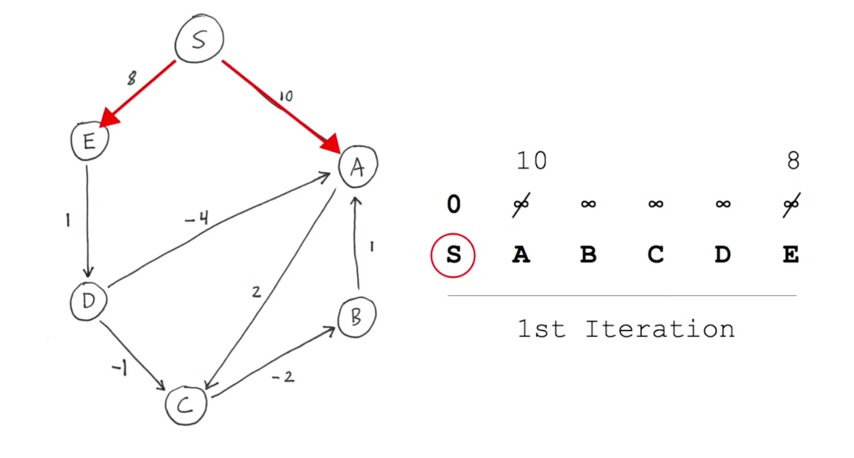

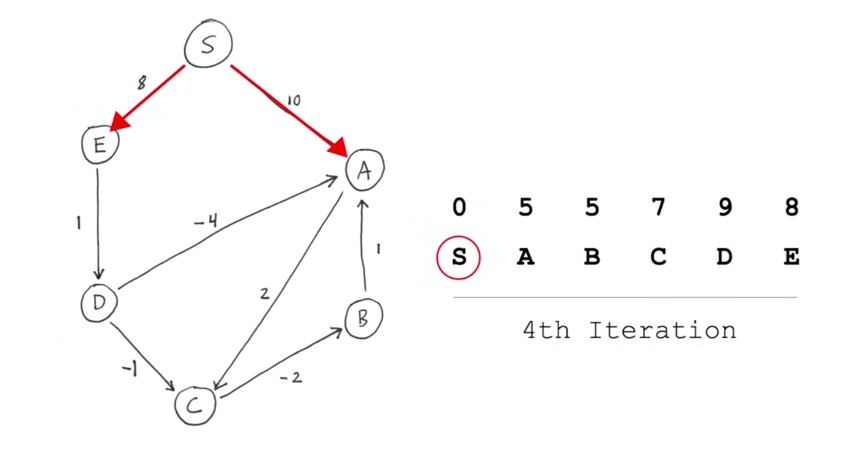

# Floyd-Warshall Algorithm

- This algorithm computes shortest paths between all pairs of vertices in a weighted graph by gradually improving an estimate of the shortest path between two vertices until it is optimal.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Initialize a distance matrix `dist` where `dist[i][j]` represents the shortest known distance from vertex `i` to vertex `j`.
   - Set `dist[i][j]` to the weight of the edge from `i` to `j` if such an edge exists, otherwise set it to `inf`.
   - Set `dist[i][i]` to `0` for all vertices to represent zero distance to itself.

2. **Triple nested loop (to improve distances)**:
   - For each vertex `k`, consider if it improves the path from vertex `i` to `j`.
   - Update `dist[i][j]` to `dist[i][k] + dist[k][j]` if a shorter path is found through vertex `k`.

3. **Result**:
   - `dist` contains the shortest paths between all pairs of vertices.

Floyd–Warshall algorithm in 4 minutes (https://youtu.be/4OQeCuLYj-4)

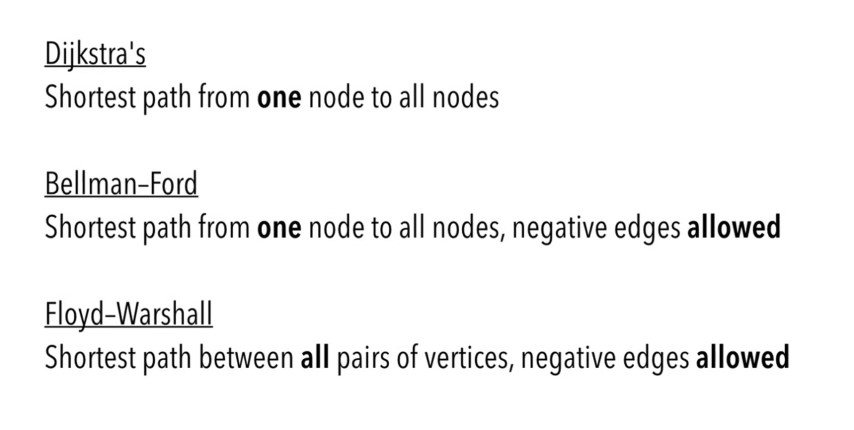

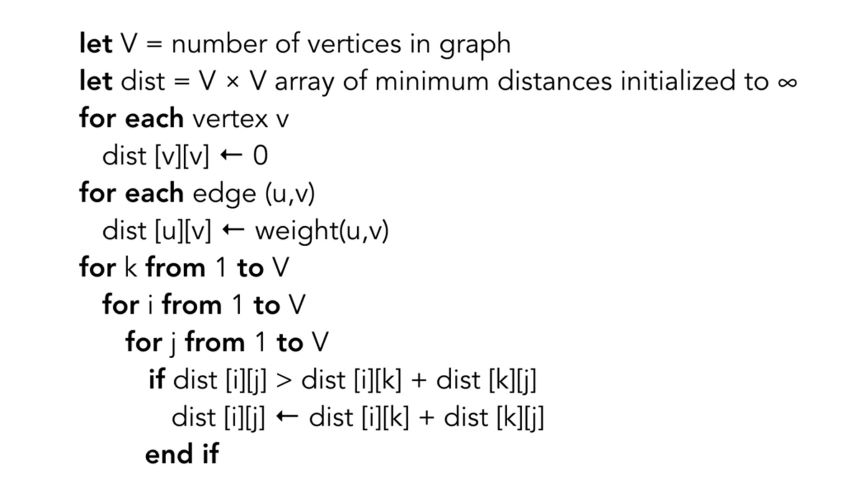

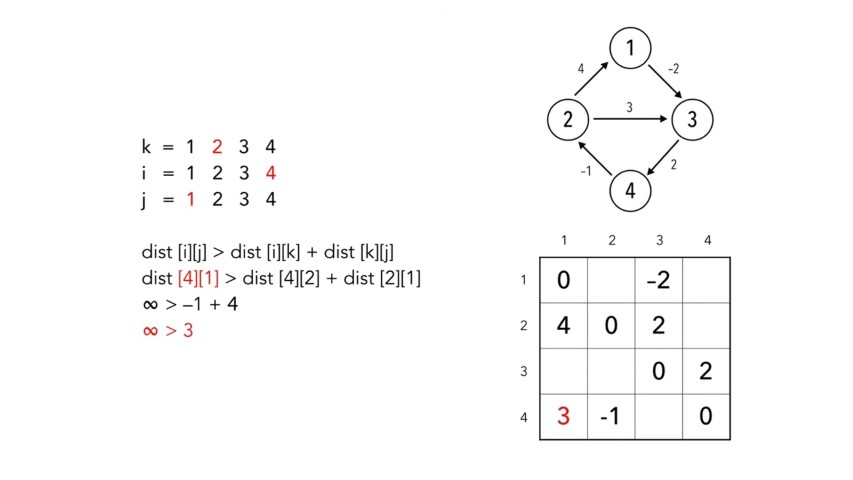

In [29]:
def floyd_warshall(adjacency_list):
  vertices = list(adjacency_list)

  # initialize distances matrix with infinities
  dist = {u: {v: float('inf') for v in vertices} for u in vertices}

  # initialize distances based on adjacency list
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      dist[u][v] = weight

  # set distance to self as 0
  for v in vertices:
    dist[v][v] = 0

  # triple nested loop to update distances
  for k in vertices:
    for i in vertices:
      for j in vertices:
        if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
          dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

  return dist


adjacency_list = {0: [(1, 10), (7, 8)],
                  1: [(5, 2)],
                  2: [(1, 1), (3, 1)],
                  3: [(4, 3)],
                  4: [(5, -1)],
                  5: [(2, -2)],
                  6: [(1, -4), (5, -1)],
                  7: [(6, 1)]}

dist = floyd_warshall(adjacency_list)
display(dist)

# validating the output (printing distances like a matrix)
[list(dist[u].values()) for u in adjacency_list]

{0: {0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8},
 1: {0: inf, 1: 0, 2: 0, 3: 1, 4: 4, 5: 2, 6: inf, 7: inf},
 2: {0: inf, 1: 1, 2: 0, 3: 1, 4: 4, 5: 3, 6: inf, 7: inf},
 3: {0: inf, 1: 1, 2: 0, 3: 0, 4: 3, 5: 2, 6: inf, 7: inf},
 4: {0: inf, 1: -2, 2: -3, 3: -2, 4: 0, 5: -1, 6: inf, 7: inf},
 5: {0: inf, 1: -1, 2: -2, 3: -1, 4: 2, 5: 0, 6: inf, 7: inf},
 6: {0: inf, 1: -4, 2: -4, 3: -3, 4: 0, 5: -2, 6: 0, 7: inf},
 7: {0: inf, 1: -3, 2: -3, 3: -2, 4: 1, 5: -1, 6: 1, 7: 0}}

[[0, 5, 5, 6, 9, 7, 9, 8],
 [inf, 0, 0, 1, 4, 2, inf, inf],
 [inf, 1, 0, 1, 4, 3, inf, inf],
 [inf, 1, 0, 0, 3, 2, inf, inf],
 [inf, -2, -3, -2, 0, -1, inf, inf],
 [inf, -1, -2, -1, 2, 0, inf, inf],
 [inf, -4, -4, -3, 0, -2, 0, inf],
 [inf, -3, -3, -2, 1, -1, 1, 0]]

In [30]:
adjacency_list = {
    1: [(3, -2)],
    2: [(1, 4), (3, 3)],
    3: [(4, 2)],
    4: [(2, -1)],
}

dist = floyd_warshall(adjacency_list)
display(dist)

# validating the output (printing distances like a matrix)
[list(dist[u].values()) for u in adjacency_list]

{1: {1: 0, 2: -1, 3: -2, 4: 0},
 2: {1: 4, 2: 0, 3: 2, 4: 4},
 3: {1: 5, 2: 1, 3: 0, 4: 2},
 4: {1: 3, 2: -1, 3: 1, 4: 0}}

[[0, -1, -2, 0], [4, 0, 2, 4], [5, 1, 0, 2], [3, -1, 1, 0]]

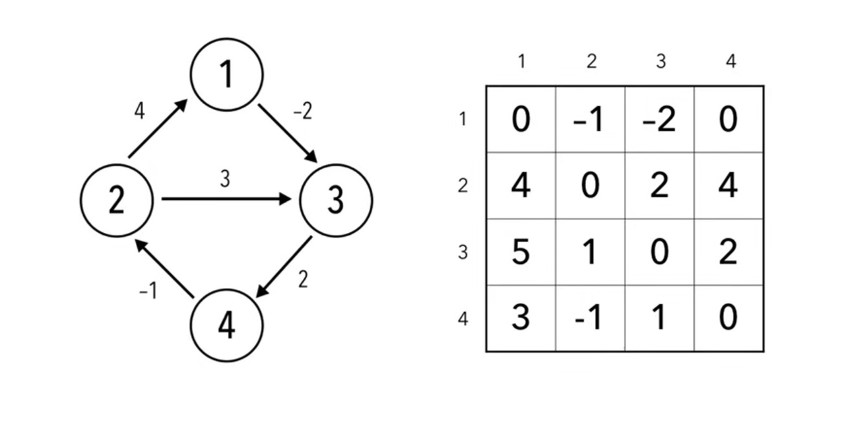

# Trees 🌳

A tree is a connected, acyclic graph.

- Edges are called branches.
- Nodes without children are called leaf nodes.
- Each node has exactly one parent.
- There is a unique path between any two nodes.
- A tree with ‘n’ nodes has ‘n-1’ edges.
- Having more than ‘n-1’ edges forms a cycle, making it a cyclic graph.
- Removing any edge disconnects the tree.
- Directed Acyclic Graphs (DAGs) do not have cycles but allow multiple parents for a node, which violates the single-parent rule of trees.
- DAGs may have disconnected components, violating the connected nature required for trees.
- DAGs can also be considered trees if each node has exactly one parent and the DAG is connected.
- A node without any parent is called a root node (relevant for directed graphs only; for undirected graphs, any node can act as a starting point).

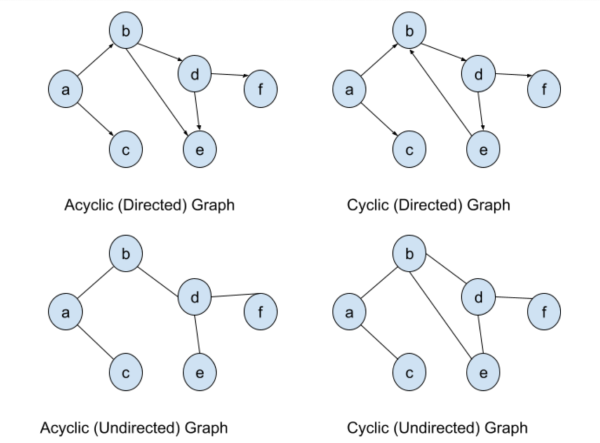

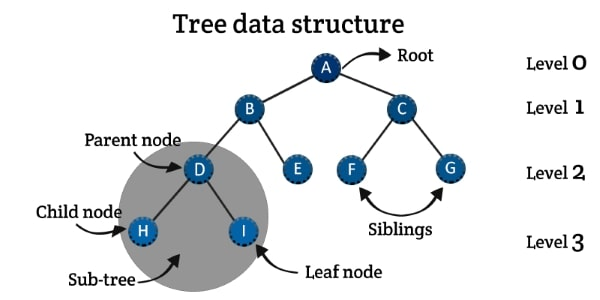

# Forest 🌳🌳🌳🌳🌳

A forest is a collection of disjoint trees, meaning it is a disconnected, acyclic graph where each component is a tree.

- "Disjoint" means the trees are disconnected; a node cannot belong to two trees simultaneously (as it would connect those trees).

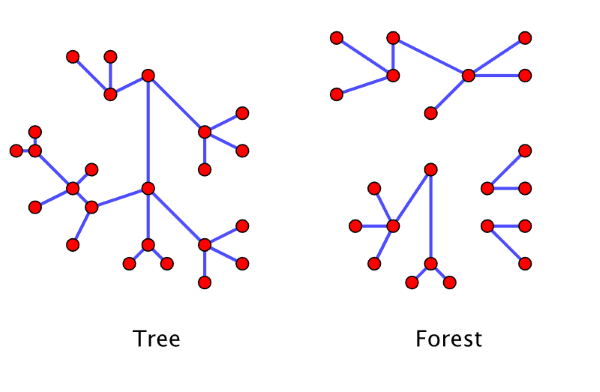

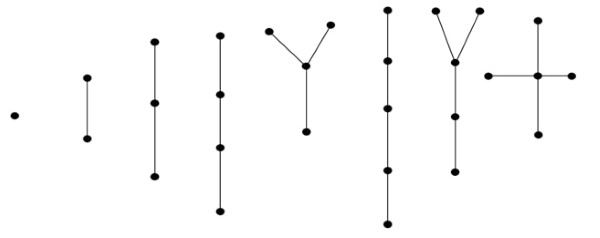

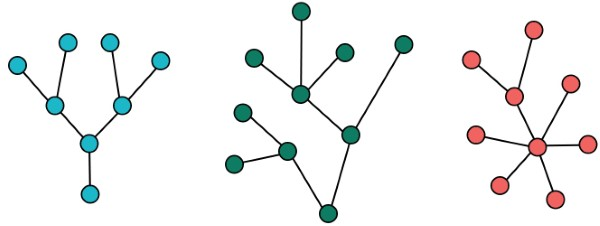

# Spanning Tree

A spanning tree of a graph is a subgraph that is a tree and includes all vertices of the original graph.

- H is a spanning tree of G if:
  - H is a tree.
  - H contains all vertices of G.

**Difference Between Trees and Spanning Trees**

Spanning trees differ from general trees in that they include all vertices of the graph. While a graph can have multiple trees, not all trees include all graph vertices. Spanning trees are special because they span the entire graph, including every vertex.

**Minimum Cost Spanning Tree (MCST)**: Spanning trees for a graph are not unique; there can be many spanning trees for the same graph. Among the different spanning trees, the MCST is the one with the minimum total edge weight.

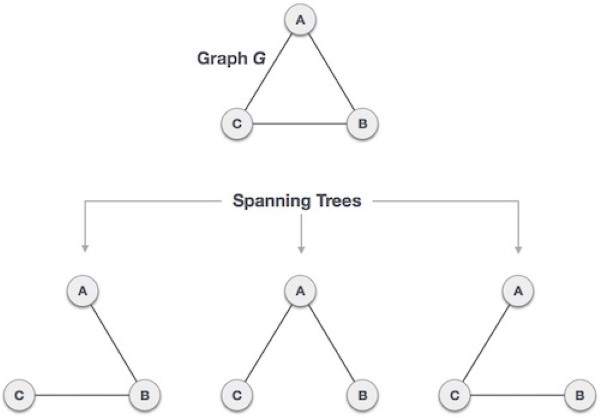

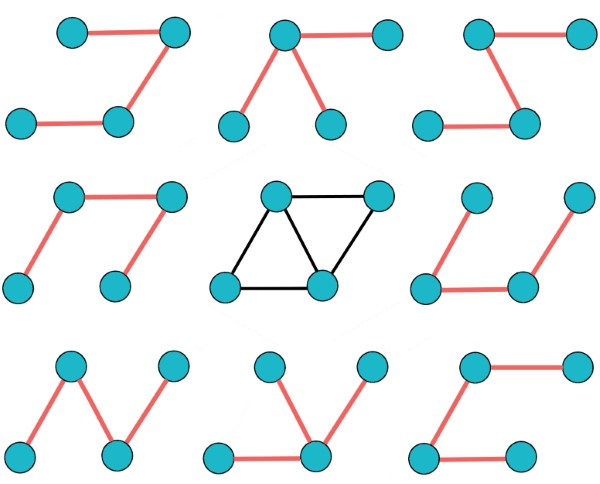

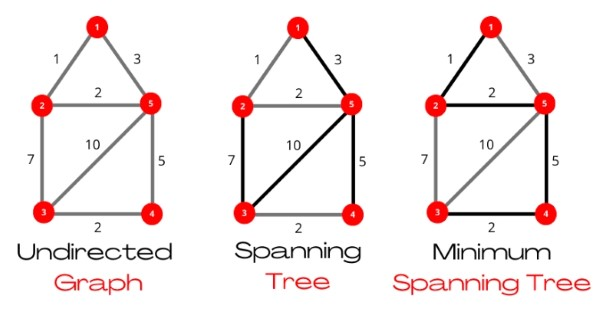

# Minimum Cost Spanning Tree (MCST)

> Among the different spanning trees, the MCST is the one with the minimum total edge weight.

**Find a minimum (cost) spanning tree (MST/MCST) for a weighted undirected graph.**

- Prim's Algorithm

  > Starts with a single vertex and expands the spanning tree by adding the cheapest available edge to an unvisited vertex.

- Kruskal's Algorithm

  > Sort edges by weight and add the smallest edge that doesn't form cycles until all vertices are connected.

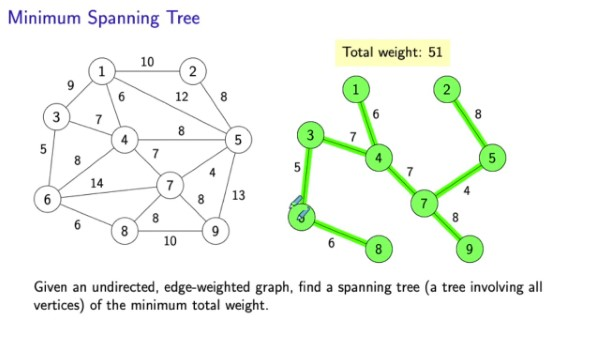

# Prim's Algorithm

> Starts with a single vertex and expands the spanning tree by adding the cheapest available edge to an unvisited vertex.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Start with an empty MST (`mst`).
   - Initialize `pq` to prioritize edges _(priority is weight, item is (u, v))._
   - Initialize `visited` to track visited vertices (`False` initially).

2. **Processing**:
   - Enqueue edges from `start_vertex` into `pq`.
   - While `pq` isn't empty:
     - Dequeue the edge `(weight, (u, v))` with the smallest weight.
     - If edge connects to unvisited `v`:
       - Add `(u, v, weight)` to `mst`.
       - Mark `v` as visited.
       - Enqueue `v`'s edges `(next_weight, (v, next_neighbor))` to `pq` if `next_neighbor` isn't visited.

2. **Result**:
   - `mst` has nodes and minimum-weight edges connecting all without cycles.

Prim's algorithm in 2 minutes (https://youtu.be/cplfcGZmX7I)

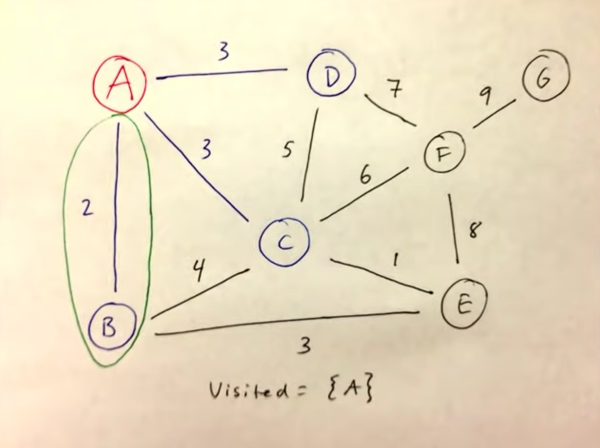

In [31]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))  # (priority is weight, item is (u, v))

  def dequeue(self):
    return heapq.heappop(self.heap)  # returns (weight, (u, v))


def prim(adjacency_list, start_vertex):
  mst = []
  pq = PriorityQueue()
  visited = {vertex: False for vertex in adjacency_list}
  visited[start_vertex] = True

  # add all edges from start_vertex to the priority queue
  for neighbor, weight in adjacency_list[start_vertex]:
    pq.enqueue(weight, (start_vertex, neighbor))

  while not pq.is_empty():
    weight, (u, v) = pq.dequeue()

    # if the edge connects to an unvisited node, add this edge to the mst
    if not visited[v]:
      mst.append((u, v, weight))
      visited[v] = True

      # enqueue edges of v that connect to unvisited nodes
      for next_neighbor, next_weight in adjacency_list[v]:
        if not visited[next_neighbor]:
          pq.enqueue(next_weight, (v, next_neighbor))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

mst = prim(adjacency_list, 0)
print("minimum spanning tree (mst):", mst)

minimum spanning tree (mst): [(0, 2, 6), (2, 1, 4), (2, 3, 11)]


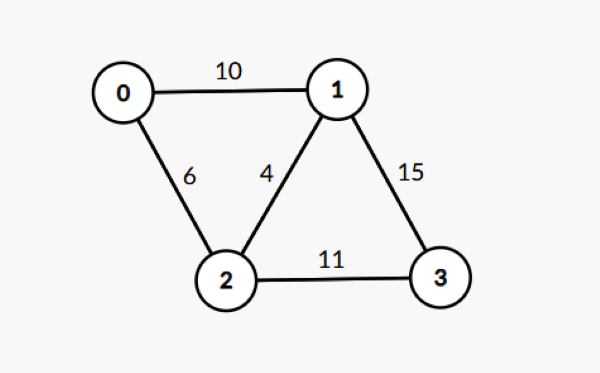

In [32]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

prim(adjacency_list, 'A')

[('A', 'B', 2),
 ('A', 'C', 3),
 ('C', 'E', 1),
 ('A', 'D', 3),
 ('C', 'F', 6),
 ('F', 'G', 9)]

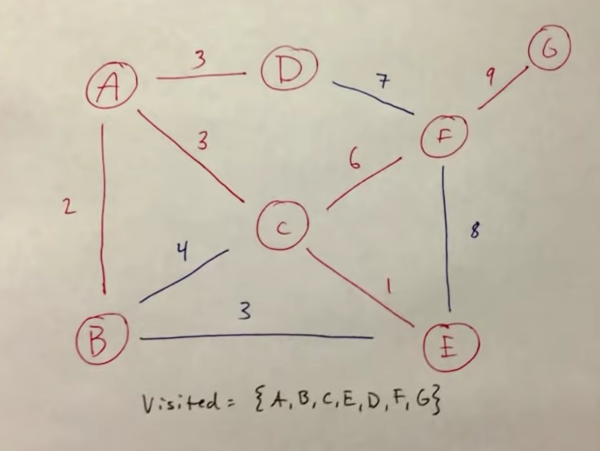

## Union-Find Demo

- **find(node)**: Finds the root parent of a node.
- **union(u, v)**:
  - Attempts to merge nodes `u` and `v`.
  - If `u` and `v` belong to the same component (same root parent), merging is prevented to avoid cycles.
  - Otherwise, it merges the roots of `u` and `v` by updating the `parent`.

#### Union Behavior:

- **union(`E`, `H`)**: Since both `E` and `H` come from the same root (`F`), they cannot be merged because it would create a cycle. Nodes belonging to the same component cannot be directly connected without forming a cycle.

- **union(`D`, `C`)**: Since `D` (_root `F`_) and `C` (_root `A`_) come from different roots, they are successfully merged (_`F` becomes the root for both_).

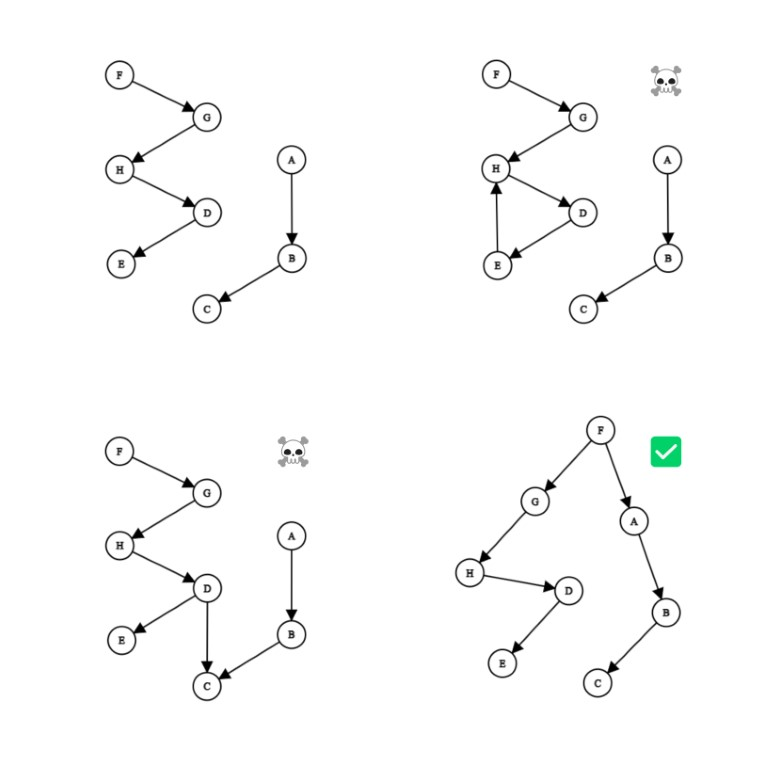

In [33]:
parent = {
    # component 1
    'A': 'A',
    'B': 'A',
    'C': 'B',

    # component 2
    'F': 'F',
    'G': 'F',
    'H': 'G',
    'D': 'H',
    'E': 'D',
}


def find(node):
  while parent[node] != node:
    node = parent[node]
  return node


def union(u, v):
  root1 = find(u)
  root2 = find(v)
  if root1 == root2:
    print(f'☠️ union {u}, {v}: {root1=}, {root2=}, cannot merge, because a cycle would be created')
  else:
    parent[root2] = root1
    print(f'✅ union {u}, {v}: {root1=}, {root2=}, merged successfully!')


print(find('A'))
print(find('C'))
print(find('D'))
union('E', 'H')
union('D', 'C')

A
A
F
☠️ union E, H: root1='F', root2='F', cannot merge, because a cycle would be created
✅ union D, C: root1='F', root2='A', merged successfully!


# Kruskal's Algorithm

> Sort edges by weight and add the smallest edge that doesn't form cycles until all vertices are connected.

**Note:** This algorithm is **_only for undirected graphs_** and does not work on directed graphs.

🌿🌿 **Walkthrough**

1. **Initialization**:
   - Start with an empty MST (`mst`).
   - Initialize `edges` with all `(weight, u, v)` tuples from `adjacency_list`, _sorted by weight._

2. **Union-Find Structure**:
   - Use `parent` dictionary; each vertex starts as its own parent.
   - Define `find(node)` to find root parent.

3. **Process Edges**:
   - Iterate `edges`:
     - Find roots `root1` and `root2` of `u` and `v`.
     - If different roots:
       - Merge by setting `parent[root2] = root1`.
       - Add `(u, v, weight)` to `mst`.

4. **Result**:
   - `mst` has nodes and minimum-weight edges connecting all without cycles.

Kruskal's algorithm in 2 minutes (https://youtu.be/71UQH7Pr9kU)

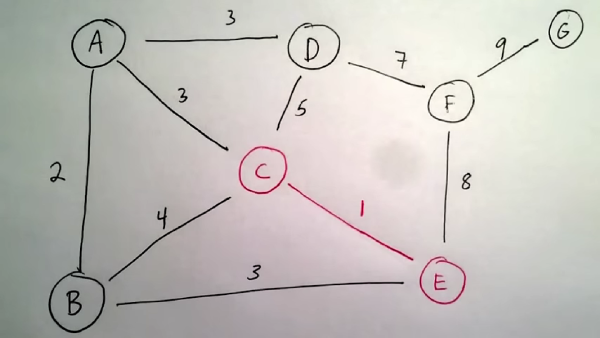

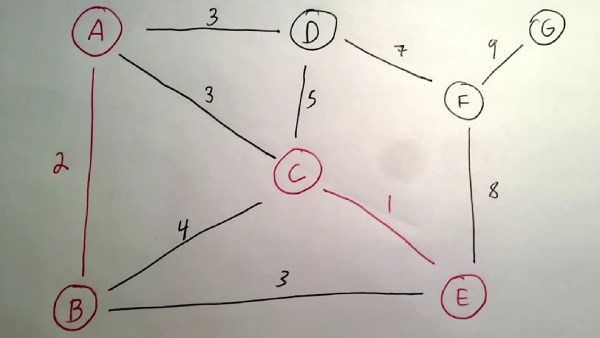

In [34]:
def kruskal(adjacency_list):
  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()  # sort edges by weight

  # initialize the parent dictionary for union-find structure
  parent = {node: node for node in adjacency_list}

  # to find the root parent of a node
  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node

  # for each edge, check if it connects two different components;
  # if so, add this edge to the mst and merge the components.
  for weight, u, v in edges:
    root1 = find(u)
    root2 = find(v)

    if root1 != root2:
      parent[root2] = root1  # union
      mst.append((u, v, weight))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

mst = kruskal(adjacency_list)
print("minimum spanning tree (mst):", mst)

minimum spanning tree (mst): [(1, 2, 4), (0, 2, 6), (2, 3, 11)]


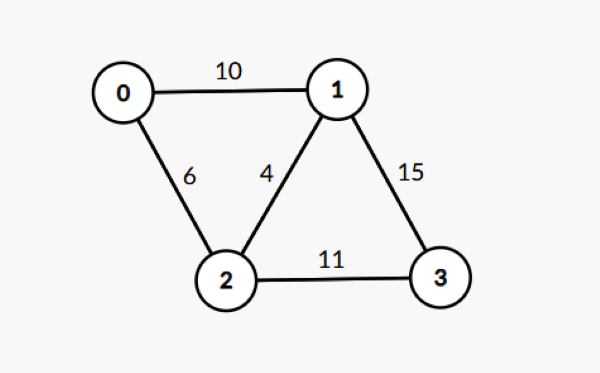

In [35]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list)

[('C', 'E', 1),
 ('A', 'B', 2),
 ('A', 'C', 3),
 ('A', 'D', 3),
 ('C', 'F', 6),
 ('F', 'G', 9)]

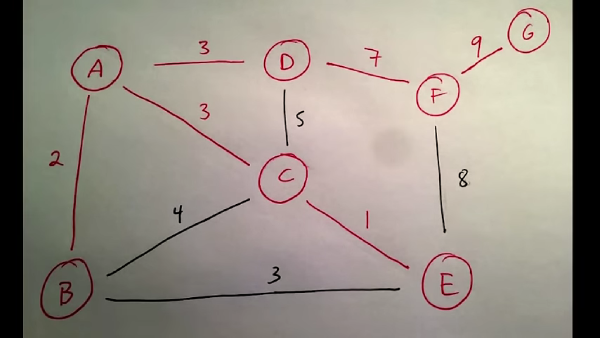

In [36]:
edges = [(5, 1, 4), (5, 4, 9), (4, 3, 5), (4, 1, 1), (4, 2, 3),
         (1, 2, 2), (3, 2, 3), (3, 6, 8), (2, 6, 7)]
vertices = get_vertices(edges)
adjacency_list = create_adjacency_list(vertices, edges)
kruskal(adjacency_list)

[(4, 1, 1), (1, 2, 2), (3, 2, 3), (5, 1, 4), (2, 6, 7)]

G-47. Kruskal's Algorithm - Minimum Spanning Tree (https://youtu.be/DMnDM_sxVig)

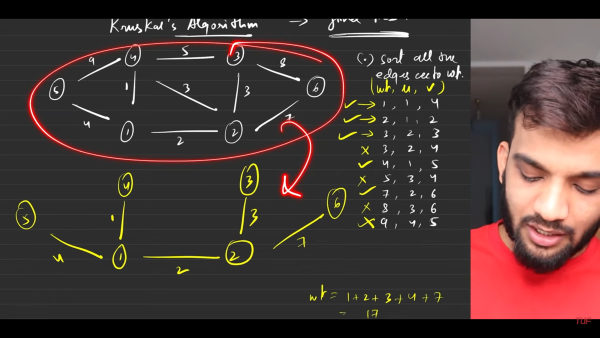